In [45]:
# import the required libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
import time
import calendar
import seaborn as sns
from scipy import stats

In [46]:
hp_df = pd.read_csv('GWR用表.csv', dayfirst = True)

In [47]:
hp_df.head(3)


,Pcd,Lat,Long,Duration,num_Dur,Old Or New,num_Old,Prd Category Type,num_Prd,Property Type,num_Pro,dis_station,station_Lat,station_Lng,dis_airport,air_Lat,air_Lng,Price
0,BR12BB,51.40,0.05,F,2,N,1.50,A,1.00,D,2.00,12.23,51.47,-0.0942,29.42,51.15,0.18,900000
1,BR12DJ,51.40,0.04,L,1,N,1.50,B,2.50,F,1.00,12.41,51.47,-0.0942,28.87,51.15,0.18,292000
2,BR12DN,51.40,0.04,F,2,N,1.50,A,1.00,T,1.40,12.42,51.47,-0.0942,28.81,51.15,0.18,460000


In [48]:
Price = hp_df['Price']

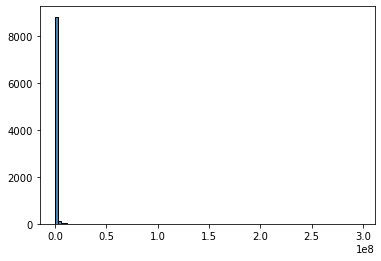

In [49]:
plt.hist(Price,bins = 100, color = 'steelblue',edgecolor = 'black')
plt.show()

<AxesSubplot:>

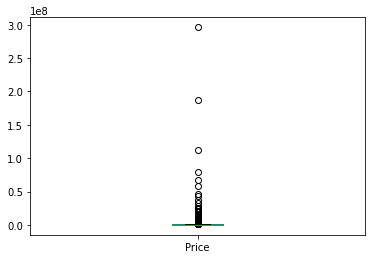

In [50]:
Price.plot.box()  #kernel density estimate plot

<AxesSubplot:xlabel='Long', ylabel='Lat'>

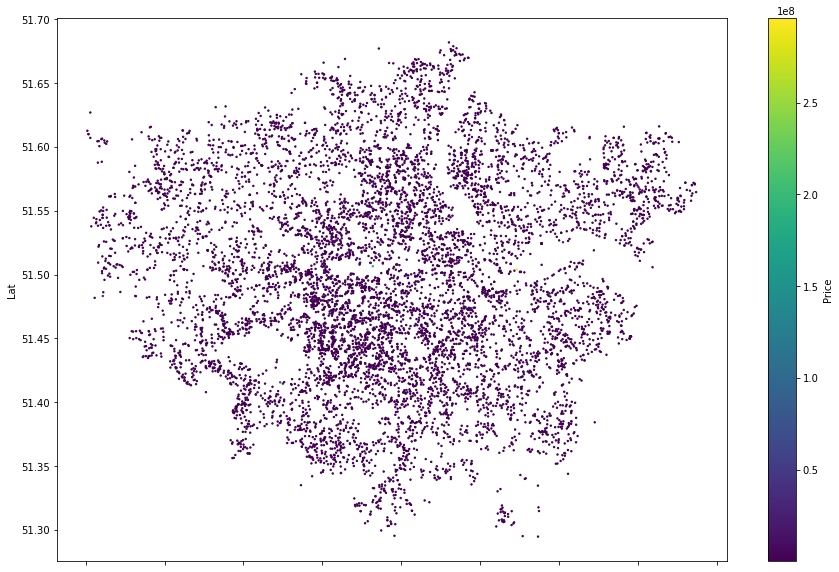

In [51]:
hp_df.plot.scatter(x='Long', y='Lat', c='Price', s=2, cmap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='Long', ylabel='Lat'>

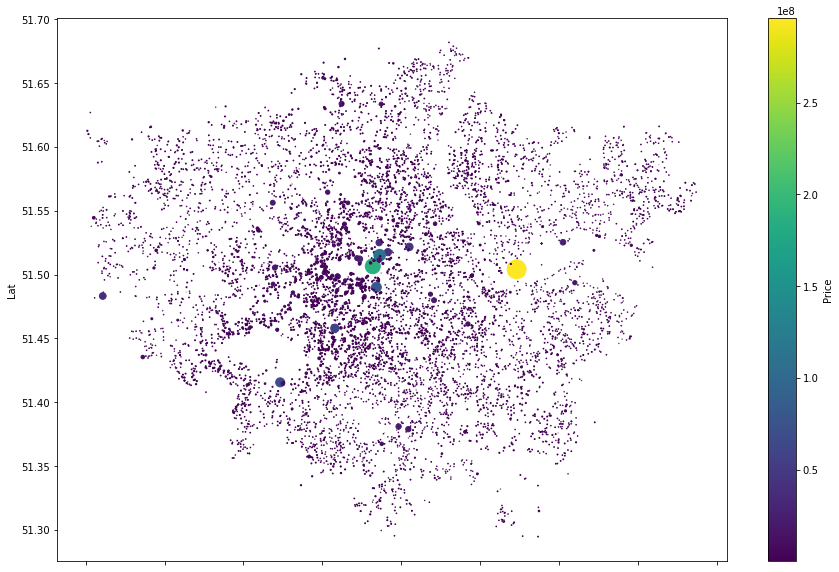

In [52]:
hp_df.plot.scatter(x='Long', y='Lat', c='Price', s=(hp_df.Price/hp_df.Price.mean()), cmap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='Long', ylabel='Lat'>

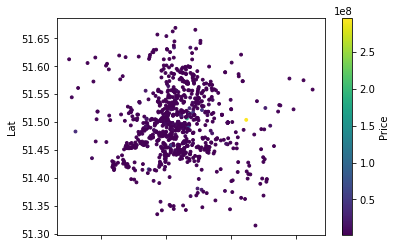

In [53]:
hp_df[hp_df.Price > hp_df.Price.quantile(0.90)].plot.scatter(x='Long', y='Lat', c='Price', cmap='viridis', s=8)

In [54]:
hp_df.drop(hp_df[hp_df.Price < 100].index, inplace=True)

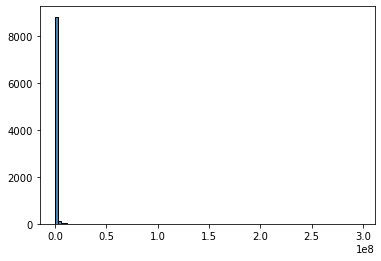

In [55]:
plt.hist(hp_df.Price,bins = 100, color = 'steelblue',edgecolor = 'black')
plt.show()

<AxesSubplot:>

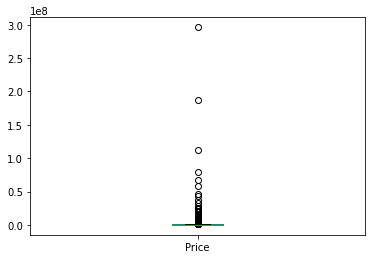

In [56]:
hp_df.Price.plot.box()

<AxesSubplot:xlabel='Long', ylabel='Lat'>

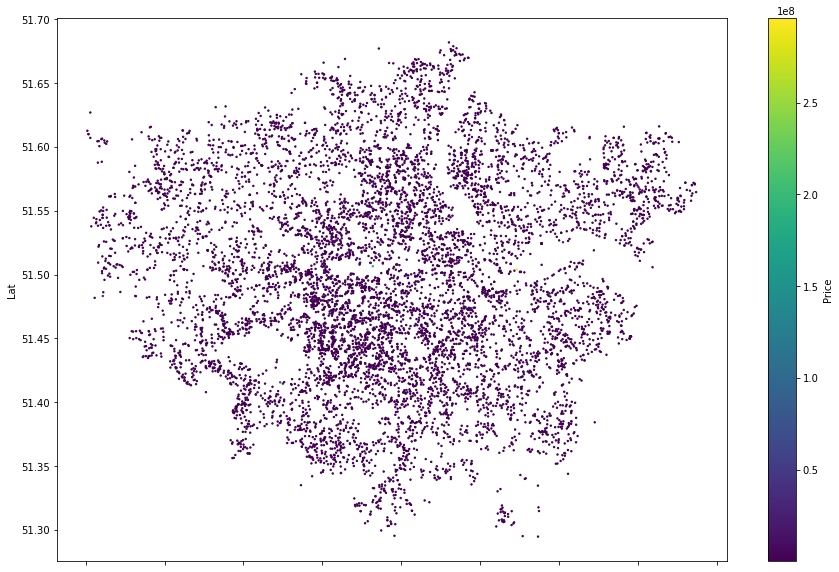

In [57]:
hp_df.plot.scatter(x='Long', y='Lat', c='Price', s=2, cmap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='Long', ylabel='Lat'>

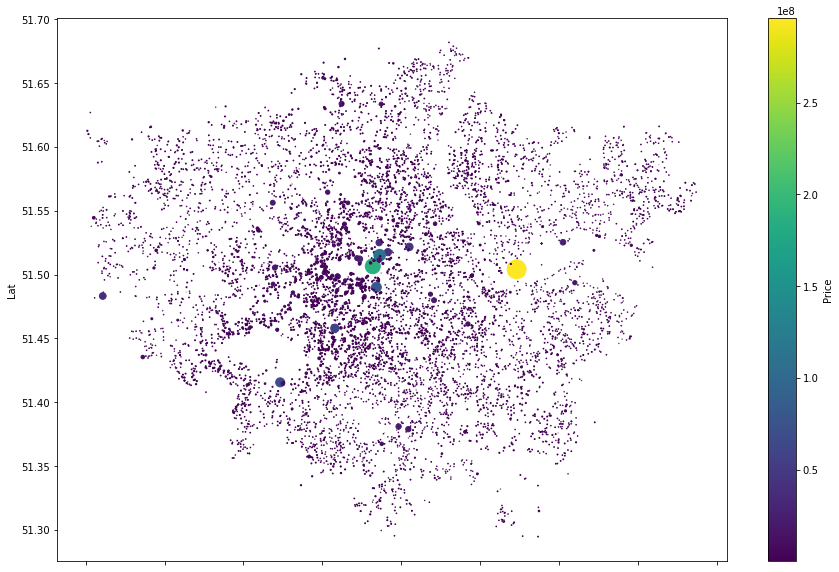

In [58]:
hp_df.plot.scatter(x='Long', y='Lat', c='Price', s=(hp_df.Price/hp_df.Price.mean()), cmap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='Long', ylabel='Lat'>

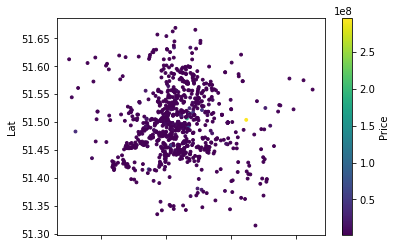

In [59]:
hp_df[hp_df.Price > hp_df.Price.quantile(0.90)].plot.scatter(x='Long', y='Lat', c='Price', cmap='viridis', s=8)

In [69]:
hp_df.describe()

,Lat,Long,num_Dur,num_Old,num_Prd,num_Pro,dis_station,dis_airport,air_Lat,air_Lng,Price
count,"8,989.00","9,005.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00"
mean,51.50,-0.11,1.57,1.49,1.25,1.57,9.54,24.16,51.46,-0.31,"831,103.82"
std,0.08,0.15,0.50,0.08,0.56,1.36,5.53,8.18,0.15,0.30,"4,307,384.04"
min,51.29,-0.50,1.00,1.00,1.00,1.00,0.07,1.42,51.15,-0.45,100.00
25%,51.44,-0.21,1.00,1.50,1.00,1.00,4.93,18.51,51.47,-0.45,"375,000.00"
50%,51.49,-0.12,2.00,1.50,1.00,1.30,8.93,25.34,51.47,-0.45,"500,000.00"
75%,51.56,-0.01,2.00,1.50,1.00,1.40,13.78,30.80,51.47,-0.45,"725,000.00"
max,51.68,0.27,2.00,1.50,2.50,7.00,25.26,39.93,51.88,0.69,"296,280,000.00"


In [67]:
print ('Number of outliers, purchase price > 10m' + len(hp_df[hp_df['Price']>10000000]))
hst_df = hp_df[hp_df['Price']<=10000000]
ax = hst_df[(np.abs(stats.zscore(hst_df['Price'])) < 3)]['Price'].hist(bins=10)
ax.set_title("Purchase price histogram")
ax.set_xlabel("number of properties")
ax.set_ylabel("purchase price (GBP)")

TypeError: can only concatenate str (not "int") to str

In [44]:
outputpath='data_pro.csv'
hp_df.to_csv(outputpath,sep=',',index=False,header=False)

In [43]:
# length of the pandas dataframe
print( "Number of records in the dataframe is", len(hp_df))
# show the stastical summary of the data
pd.options.display.float_format = '{:20,.2f}'.format
hp_df.describe()
#hp_df.dtypes

Number of records in the dataframe is 9015


,Lat,Long,num_Dur,num_Old,num_Prd,num_Pro,dis_station,dis_airport,air_Lat,air_Lng,Price
count,"8,989.00","9,005.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00","9,015.00"
mean,51.50,-0.11,1.57,1.49,1.25,1.57,9.54,24.16,51.46,-0.31,"831,103.82"
std,0.08,0.15,0.50,0.08,0.56,1.36,5.53,8.18,0.15,0.30,"4,307,384.04"
min,51.29,-0.50,1.00,1.00,1.00,1.00,0.07,1.42,51.15,-0.45,100.00
25%,51.44,-0.21,1.00,1.50,1.00,1.00,4.93,18.51,51.47,-0.45,"375,000.00"
50%,51.49,-0.12,2.00,1.50,1.00,1.30,8.93,25.34,51.47,-0.45,"500,000.00"
75%,51.56,-0.01,2.00,1.50,1.00,1.40,13.78,30.80,51.47,-0.45,"725,000.00"
max,51.68,0.27,2.00,1.50,2.50,7.00,25.26,39.93,51.88,0.69,"296,280,000.00"


In [41]:
#ll_df = pd.read_csv('combinedData.csv')

In [42]:
#ll_df.tail()

,pcd,lat,long
11481,UB100UG,51.45,-0.38
11482,UB100UH,51.45,-0.38
11483,UB100UJ,51.45,-0.38
11484,UB100UP,51.45,-0.38
11485,UB100UR,51.45,-0.38


In [14]:
#pl_df=pd.merge(hp_df, ll_df, how='left', on='pcd')
#pl_df.head(3)
!pip install cartopy

     |████████████████████████████████| 12.1 MB 4.9 MB/s eta 0:00:01    |██▏                             | 829 kB 913 kB/s eta 0:00:13     |███▌                            | 1.3 MB 913 kB/s eta 0:00:12     |████▎                           | 1.6 MB 913 kB/s eta 0:00:12     |████████▏                       | 3.1 MB 913 kB/s eta 0:00:10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 5.9 MB/s eta 0:00:01     |██████████▍                     | 71 kB 6.4 MB/s eta 0:00:01
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12888839 sha256=9b352b69a731cd2a8261d667b74669e06f2fd5681306943c719899e1703e664b
  Stored in directory: /home/jovyan/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37264 sha256=795b8d099e864663b320091facdd7fb2fd

In [22]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85053 entries, 0 to 85052
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               85053 non-null  object
 1   price            85053 non-null  int64 
 2   dateOfMonth      85053 non-null  int64 
 3   pcd              85053 non-null  object
 4   propertyType     85053 non-null  object
 5   oldOrNew         85053 non-null  object
 6   duration         85053 non-null  object
 7   town             85053 non-null  object
 8   district         85053 non-null  object
 9   country          85053 non-null  object
 10  prdCategoryType  85053 non-null  object
 11  recordStatus     85053 non-null  object
 12  lat              82402 non-null  object
 13  long             82399 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.1+ MB


In [15]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [24]:
hp_df["lat"] = pd.to_numeric(hp_df["lat"],errors='coerce')

In [25]:
hp_df["long"] = pd.to_numeric(hp_df["long"],errors='coerce')

In [35]:
pl_df=hp_df

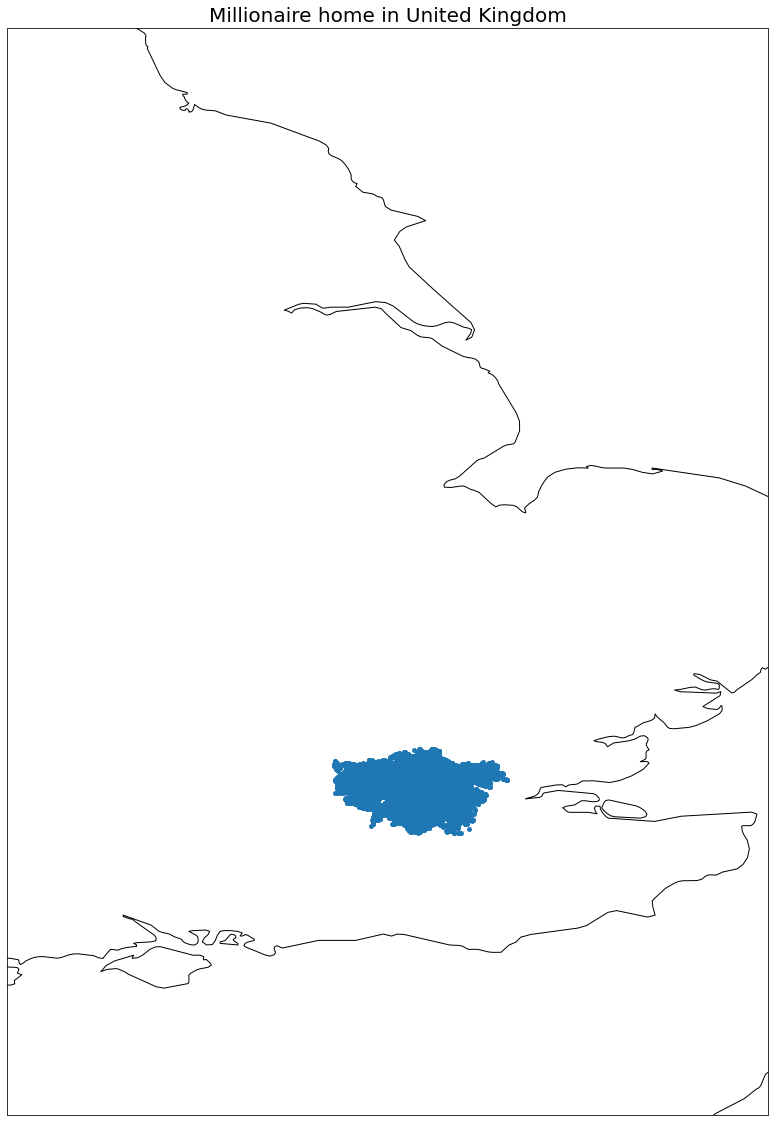

In [34]:
# millionaire homes in UK!!
fig = plt.figure(figsize=(20, 20))

# select the required projection
ax = plt.axes(projection=ccrs.PlateCarree())

# draw the required rectagle/polygon
# (x1,y1) -> (x2,y2)
# remember x-axis is longitude and y-axis is latitude
ax.set_extent([-2,1.5, 50, 55], ccrs.PlateCarree())

# get and plot geometry from shape files
# you download the shapefile for countries from global administrative areas website (http://www.gadm.org/country)
fname = 'msoa/MSOA_2011_London_gen_MHW.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='white', alpha=0.5,zorder=10)
ax.coastlines(resolution='10m')

ml_df = hp_df[hp_df.price >= 1000]
ml_df = hp_df[hp_df.price <= 1000000]
# plot the house price data onto the map, red dots for newbuilds and blue dots for others
ax.scatter(ml_df['long'],ml_df['lat'],s=15, marker='o',transform=ccrs.PlateCarree())
# set the title and show the plot
ax.set_title('Millionaire home in United Kingdom',fontsize=20)
plt.show()

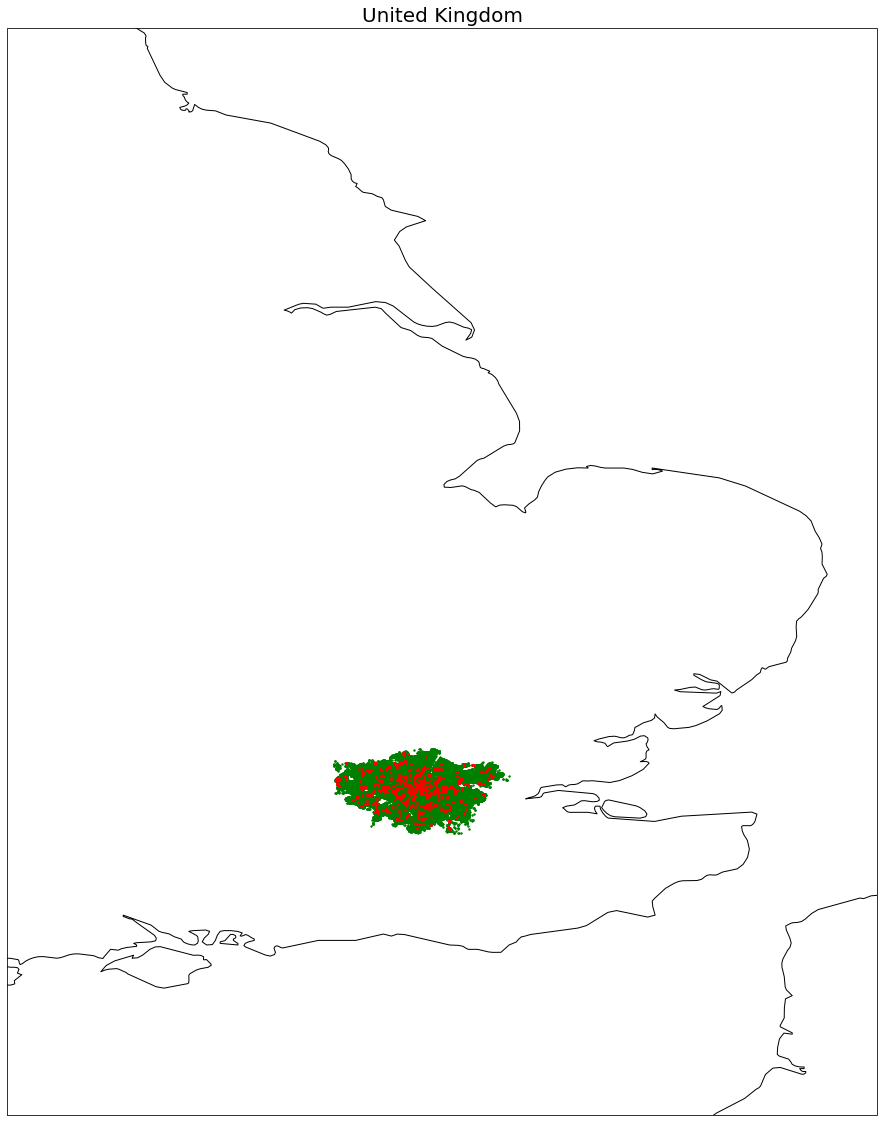

In [37]:
fig = plt.figure(figsize=(20, 20))
 
# select the required projection
ax = plt.axes(projection=ccrs.PlateCarree())
 
# draw the required rectagle/polygon
# (x1,y1) -> (x2,y2)
# remember x-axis is longitude and y-axis is latitude
ax.set_extent([-2, 2, 50, 55], ccrs.PlateCarree())
 
# get and plot geometry from shape files
# you download the shapefile for countries from global administrative areas website (http://www.gadm.org/country)
fname = 'msoa/MSOA_2011_London_gen_MHW.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='white', alpha=0.5,zorder=10)
ax.coastlines(resolution='10m')
 
# plot the house price data onto the map, red dots for newbuilds and blue dots for others
ax.scatter(pl_df[pl_df['oldOrNew'] == 'N']['long'],pl_df[pl_df['oldOrNew'] == 'N']['lat'],color = 'green',s=2, marker='o',transform=ccrs.PlateCarree())
ax.scatter(pl_df[pl_df['oldOrNew'] == 'Y']['long'],pl_df[pl_df['oldOrNew'] == 'Y']['lat'],color='red',s=2, marker='o',transform=ccrs.PlateCarree())
 
# set the title and show the plot
ax.set_title('United Kingdom',fontsize=20)
plt.show()